# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [11]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [12]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2019-02-24 04:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,2019-03-06 04:28,34.58,3.910000e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type

total_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_ride_count.head()


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type

total_driver_sum = city_data_df.groupby(["type"]).sum()["driver_count"]
total_driver_sum



type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type

total_fares_sum = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_sum


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
average_fare_ride = pyber_data_df.groupby(["type"]).mean()["fare"]
average_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
average_fare_driver = total_fares_sum / total_driver_sum
average_fare_driver


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    "Total Rides": total_ride_count ,
    "Total Drivers": total_driver_sum,
    "Total Fares": total_fares_sum,
    "Average Fare per Ride": average_fare_ride,
    "Average Fare per Driver": average_fare_driver})
pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None


SyntaxError: invalid syntax (Temp/ipykernel_31740/2898344397.py, line 1)

In [ ]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [13]:
# 1. Read the merged DataFrame
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2019-02-24 04:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,2019-03-06 04:28,34.58,3.910000e+12,46,Urban


In [14]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
date_fares_df= pyber_data_df.groupby(["type","date"]).sum()["fare"]
date_fares_df

type   date            
Rural  2019-01-01 09:45    43.69
       2019-01-02 11:18    52.12
       2019-01-03 19:51    19.90
       2019-01-04 03:31    24.88
       2019-01-06 07:38    47.33
                           ...  
Urban  2019-05-08 04:20    21.99
       2019-05-08 04:39    18.45
       2019-05-08 07:29    18.55
       2019-05-08 11:38    19.77
       2019-05-08 13:10    18.04
Name: fare, Length: 2364, dtype: float64

In [15]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
date_fares_df = date_fares_df.reset_index()
date_fares_df.tail()

,type,date,fare
2359,Urban,2019-05-08 04:20,21.99
2360,Urban,2019-05-08 04:39,18.45
2361,Urban,2019-05-08 07:29,18.55
2362,Urban,2019-05-08 11:38,19.77
2363,Urban,2019-05-08 13:10,18.04


In [16]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
date_fares_df_pivot = date_fares_df.pivot(index="date",columns="type",values="fare")
date_fares_df_pivot.tail(10)

type,Rural,Suburban,Urban
date,,,
2019-05-07 20:05,NaN,NaN,24.20
2019-05-07 20:22,NaN,NaN,18.74
2019-05-07 20:40,NaN,24.89,NaN
2019-05-08 01:54,NaN,NaN,32.69
2019-05-08 02:31,NaN,NaN,41.33
2019-05-08 04:20,NaN,NaN,21.99
2019-05-08 04:39,NaN,NaN,18.45
2019-05-08 07:29,NaN,NaN,18.55
2019-05-08 11:38,NaN,NaN,19.77


In [17]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

date_new_df = date_fares_df_pivot.loc["2019-01-01":"2019-04-29"]
date_new_df


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08,NaN,NaN,37.91
2019-01-01 00:46,NaN,47.74,NaN
2019-01-01 02:07,NaN,24.07,NaN
2019-01-01 03:46,NaN,NaN,7.57
2019-01-01 05:23,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28,NaN,NaN,11.46
2019-04-28 16:29,NaN,NaN,36.42
2019-04-28 17:26,NaN,NaN,31.43


In [18]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

date_new_df.index = pd.to_datetime(date_new_df.index)
date_new_df.index

DatetimeIndex(['2019-01-01 00:08:00', '2019-01-01 00:46:00',
               '2019-01-01 02:07:00', '2019-01-01 03:46:00',
               '2019-01-01 05:23:00', '2019-01-01 09:45:00',
               '2019-01-01 12:32:00', '2019-01-01 14:40:00',
               '2019-01-01 14:42:00', '2019-01-01 14:52:00',
               ...
               '2019-04-28 09:25:00', '2019-04-28 10:54:00',
               '2019-04-28 11:40:00', '2019-04-28 11:49:00',
               '2019-04-28 12:48:00', '2019-04-28 14:28:00',
               '2019-04-28 16:29:00', '2019-04-28 17:26:00',
               '2019-04-28 17:38:00', '2019-04-28 19:35:00'],
              dtype='datetime64[ns]', name='date', length=2182, freq=None)

In [19]:
# 7. Check that the datatype for the index is datetime using df.info()
date_fares_df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2361 entries, 2019-01-01 00:08 to 2019-05-08 13:10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  622 non-null    float64
 2   Urban     1617 non-null   float64
dtypes: float64(3)
memory usage: 138.3+ KB


In [20]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
data_week_df = date_new_df.resample("W").sum()
data_week_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


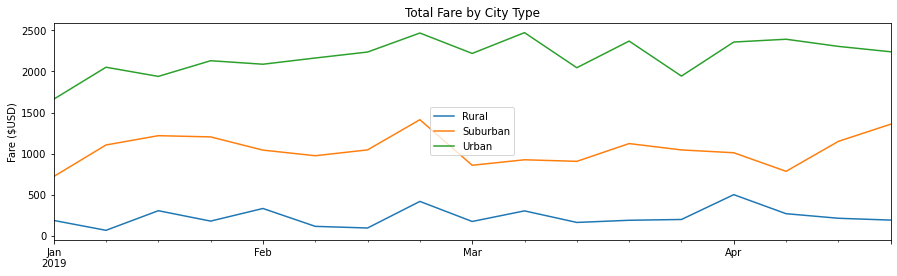

<Figure size 432x288 with 0 Axes>

In [21]:
# 9. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

fares_graph = data_week_df.plot(figsize=(15,4), title="Total Fare by City Type")
fares_graph.set_xlabel(None)
fares_graph.set_ylabel("Fare ($USD)")
fares_graph.legend(loc='center')


# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# save image with padding and adjusting for avoiding cropping
plt.savefig('analysis/PyBer.png', bbox_inches = 'tight', pad_inches=0.2)
# show image
plt.show()
plt.tight_layout()
